In [40]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pymysql as mdb
%matplotlib inline
import geocoder
from sklearn import datasets, linear_model
import pickle
import geocoder
import pandas as pd
import pymysql as mdb
import numpy as np
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity
import scipy.stats as st


In [86]:
zipcode = '10003'
#instead sample randomly from the last two years, train on 80% and test on 20%
con = mdb.connect('localhost', 'root', '', 'noisecomplaintsnewcoord2')
data2015 = pd.read_sql('SELECT * FROM noisecomplaintsnewcoordtable2 WHERE incident_zip = "%s"  AND created_date <= "2015-10-31" AND created_date >= "2015-01-01"' %(zipcode), con)
data2014 = pd.read_sql('SELECT * FROM noisecomplaintsnewcoordtable2 WHERE incident_zip = "%s"  AND created_date <= "2014-10-31" AND created_date >= "2014-01-01"' %(zipcode), con)
data = pd.read_sql('SELECT * FROM noisecomplaintsnewcoordtable2 WHERE incident_zip = "%s"  AND created_date <= "2015-10-31" AND created_date >= "2014-01-01"' %(zipcode), con)

In [109]:
zipcode = '10013'
data = pd.read_sql('SELECT * FROM noisecomplaintsnewcoordtable2 WHERE incident_zip = "%s"  AND created_date <= "2015-10-31" AND created_date >= "2010-01-01"' %(zipcode), con)

In [110]:
data['created_date']=pd.to_datetime(data['created_date'])
data.index = data.created_date
data['count'] = 1
dateandcount = data['count']
dfweek=dateandcount.resample('W',how='sum')

In [111]:
countarrayw=dfweek.values
countarrayw[np.isnan(countarrayw)] = 0

In [46]:
len(countarrayw)

305

In [112]:
countarrayw=countarrayw.reshape(305,1)

In [113]:
montharrayw=np.arange(0,305).reshape(305,1)

In [134]:
countarrayw

array([[ 7],
       [ 8],
       [15],
       [23],
       [10],
       [ 7],
       [ 9],
       [28],
       [15],
       [25],
       [15],
       [17],
       [20],
       [13],
       [20],
       [15],
       [25],
       [19],
       [20],
       [23],
       [30],
       [34],
       [13],
       [27],
       [40],
       [26],
       [15],
       [16],
       [15],
       [ 8],
       [36],
       [18],
       [19],
       [14],
       [14],
       [11],
       [24],
       [23],
       [34],
       [19],
       [31],
       [37],
       [51],
       [30],
       [18],
       [35],
       [28],
       [13],
       [10],
       [22],
       [17],
       [ 8],
       [ 6],
       [18],
       [ 9],
       [14],
       [15],
       [11],
       [30],
       [35],
       [41],
       [18],
       [19],
       [29],
       [26],
       [22],
       [21],
       [20],
       [31],
       [28],
       [24],
       [40],
       [55],
       [40],
       [24],
       [23],
       [40],

In [114]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.06903214]]


In [115]:
from sklearn.cross_validation import train_test_split

In [131]:
mtrain, mtest, countrain, countest = train_test_split(montharrayw, countarrayw, test_size=0.20, random_state=0)

In [136]:
mtrain = mtrain.reshape(244,1)


In [137]:
mtest = mtest.reshape(61,1)

In [138]:
countrain= countrain.reshape(244,1)

In [139]:
countest =countest.reshape(61,1)


In [140]:
regr = linear_model.LinearRegression()
regr.fit(mtrain, countrain)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.06903214]]


In [39]:
regr = linear_model.LinearRegression()
regr.fit(xtest, ytest)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.06625938]]


In [75]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.06903214]]


In [108]:
regr = linear_model.LinearRegression()
regr.fit(montharrayw, countarrayw)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.06793297]]


In [122]:
ytrainpred = regr.predict(xtrain)

In [129]:
ytraincountpred=regr.predict(ytrain)

In [123]:
ytestpred = regr.predict(xtest)

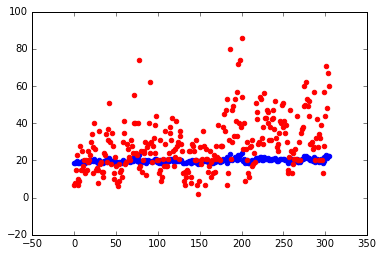

In [130]:
plt.scatter(xtrain, ytraincountpred, color='blue')
#plt.scatter(ytestpred, ytest, color='green')
plt.scatter(montharrayw, countarrayw, color = 'red')






In [81]:
from sklearn.metrics import mean_squared_error
print 'MSE train: %.3f, test: %.3f' %( mean_squared_error(ytrain, ytrainpred),  mean_squared_error(ytest, ytestpred))

MSE train: 179.530, test: 156.309


In [83]:
from sklearn.metrics import r2_score

In [84]:
print 'R^2 train: %.3f, test: %.3f' %(r2_score(ytrain, ytrainpred), r2_score(ytest, ytestpred))

R^2 train: 0.173, test: 0.153


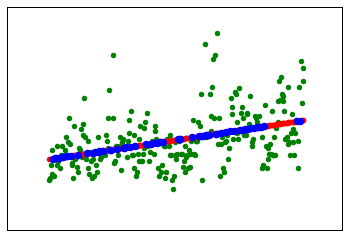

In [74]:
#plt.scatter(montharrayw, countarrayw,  color='blue')
plt.scatter(xtrain, ytrain,  color='green')
plt.scatter(xtrain, ytrainpred,  color='red')
plt.scatter(xtest, ytestpred, color='blue', linewidth=3)
#plt.plot(xtrain, regr.predict(xtrain), color='black', linewidth=3)
#plt.plot(xtest, regr.predict(xtest), color='blue', linewidth=3)


#plt.plot(montharrayw, regr.predict(montharrayw), color='black',linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [55]:
countpredict=regr.predict(ytest)

In [57]:
monthpredict = regr.predict(xtest)

In [58]:
regr = linear_model.LinearRegression()
regr.fit(ytest, countpredict)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.06793297]]


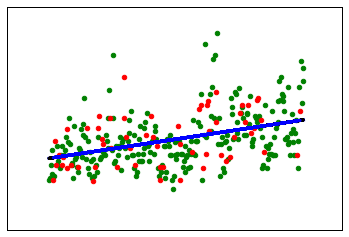

In [67]:
#plt.scatter(montharrayw, countarrayw,  color='blue')
plt.scatter(xtrain, ytrain,  color='green')
plt.scatter(xtest, ytest,  color='red')
plt.plot(montharrayw, regr.predict(montharrayw), color='blue', linewidth=3)
plt.plot(xtrain, regr.predict(xtrain), color='black', linewidth=3)
plt.plot(xtest, regr.predict(xtest), color='blue', linewidth=3)


#plt.plot(montharrayw, regr.predict(montharrayw), color='black',linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter()

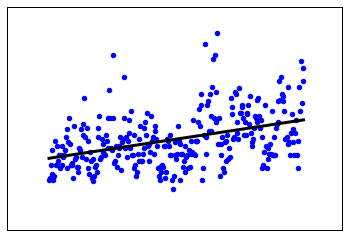

In [24]:
plt.scatter(montharrayw, countarrayw,  color='blue')

plt.plot(montharrayw, regr.predict(montharrayw), color='black',linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [107]:
data2014['created_date']=pd.to_datetime(data2014['created_date'])
data2014.index = data2014.created_date
data2014['count'] = 1
dateandcount2014 = data2014['count']
dfweek2014=dateandcount2014.resample('W',how='sum')
data2015['created_date']=pd.to_datetime(data2015['created_date'])
data2015.index = data2015.created_date
data2015['count'] = 1
dateandcount2015 = data2015['count']
dfweek2015=dateandcount2015.resample('W',how='sum')
data['created_date']=pd.to_datetime(data['created_date'])
data.index = data.created_date
data['count'] = 1
dateandcount = data['count']
dfweek=dateandcount.resample('W',how='sum')

In [112]:
countarrayw=dfweek.values
countarrayw[np.isnan(countarrayw)] = 0

In [113]:
len(countarrayw)

96

In [114]:
montharrayw=np.arange(0,96).reshape(96,1)

In [115]:
regr = linear_model.LinearRegression()
regr.fit(montharrayw, countarrayw)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[ 0.25337765]


In [109]:
countarraym=dfmonth.values
countarraym[np.isnan(countarraym)] = 0

In [ ]:
plt.scatter(montharraym, countarraym,  color='blue')

plt.plot(montharraym, regr.predict(montharraym), color='black',linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [118]:
countarraym=countarraym.reshape(22,1)

In [117]:
montharraym=np.arange(0,22).reshape(22,1)

In [119]:
regr = linear_model.LinearRegression()
regr.fit(montharraym, countarraym)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 4.93732355]]


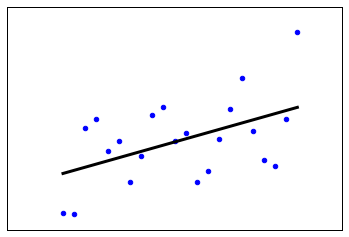

In [122]:
plt.scatter(montharraym, countarraym,  color='blue')

plt.plot(montharraym, regr.predict(montharraym), color='black',linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [51]:
countarray=dfweek.values
countarray[np.isnan(countarray)] = 0
countarray2014=dfweek2014.values
countarray2014[np.isnan(countarray)] = 0
countarray2015=dfweek2015.values
countarray2015[np.isnan(countarray)] = 0

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 44 but corresponding boolean dimension is 96
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 44 but corresponding boolean dimension is 96


In [53]:
len(countarray)
montharray=np.arange(0,96).reshape(96,1)

In [55]:
from sklearn.cross_validation import train_test_split

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(montharray, countarray, test_size=0.20, random_state=0)

In [69]:
xtrain=xtrain.reshape(76,1)

In [70]:
xtest=xtest.reshape(20,1)

In [71]:
ytrain=ytrain.reshape(76,1)

In [72]:
ytest=ytest.reshape(20,1)

In [73]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.28490728]]


In [95]:
regr = linear_model.LinearRegression()
regr.fit(ytest, countpredict)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.28490728]]


In [11]:
regr = linear_model.LinearRegression()
regr.fit(ytest, xtest)
print 'Coefficients: \n', regr.coef_

NameError: name 'ytest' is not defined

In [96]:
regr = linear_model.LinearRegression()
regr.fit(montharray, countarray)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[ 0.25337765]


In [76]:
countpredict=regr.predict(ytest)

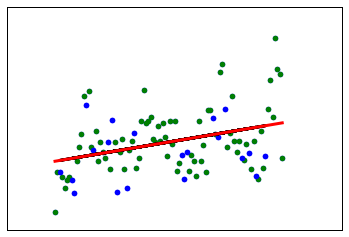

In [99]:
plt.scatter(montharray, countarray,  color='blue')
plt.scatter(xtrain, ytrain, color='green')
plt.scatter(xtest, ytest, color = 'blue')
plt.plot(xtest, regr.predict(xtest), color='black',linewidth=3)
plt.plot(montharray, regr.predict(montharray), color ='red', linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#try validating on one year?

In [23]:
montharray2014=np.arange(0,44).reshape(44,1)

In [31]:
countarray2015=countarray2015.reshape(44,1)
countarray2014=countarray2014.reshape(44,1)

In [25]:
len(countarray2015)

44

In [26]:
montharray2015=np.arange(44,88).reshape(44,1)
len(montharray2015)

44

In [34]:
regr = linear_model.LinearRegression()
regr.fit(montharray2014, countarray2014)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[[ 0.5584919]]


In [33]:
count2015predict=regr.predict(countarray2015)

In [41]:
regr = linear_model.LinearRegression()


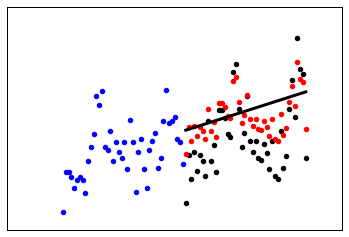

In [37]:
plt.scatter(montharray2015, countarray2015,  color='black')
plt.scatter(montharray2014, countarray2014, color='blue')
plt.scatter(montharray2015, count2015predict, color = 'red')
plt.plot(montharray2015, regr.predict(montharray2015), color='black',linewidth=3)

#plt.plot(montharray, regr.predict(montharray), color = 'black')
plt.xticks(())
plt.yticks(())

plt.show()

In [207]:
ziplist = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10044, 10065, 10069, 10075, 10103, 10110, 10111, 10112, 10115, 10119, 10128, 10152, 10153, 10154, 10162, 10165, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10177, 10199, 10271, 10278, 10279, 10280, 10282, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10314, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 11004, 11005, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11351, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427, 11428, 11429, 11430, 11432, 11433, 11434, 11435, 11436, 11451, 11691, 11692, 11693, 11694, 11697]
slopedictmonth = {}
failslope={}
for zipcode in ziplist:
    try:
        con = mdb.connect('localhost', 'root', '', 'noisecomplaintsnewcoord2')
        data = pd.read_sql('SELECT * FROM noisecomplaintsnewcoordtable2 WHERE incident_zip = "%s"  AND created_date <= "2015-10-31" AND created_date >= "2014-01-01"' %(zipcode), con)
        countsofzip = len(data)
        data['created_date']=pd.to_datetime(data['created_date'])
        data.index = data.created_date
        data['count'] = 1
        dateandcount = data['count']
        dfmonth=dateandcount.resample('M',how='sum')
        countarray=dfmonth.values
        countarray[np.isnan(countarray)] = 0
        montharray=np.arange(0,len(countarray)).reshape(len(countarray),1)
        regr = linear_model.LinearRegression()
        regr.fit(montharray, countarray)
        zipslope=float(regr.coef_)
        slopedictmonth[zipcode]=zipslope
    except:
        failslope[zipcode]=1
    print zipcode

10001
10002
10003
10004
10005
10006
10007
10009
10010
10011
10012
10013
10014
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10044
10065
10069
10075
10103
10110
10111
10112
10115
10119
10128
10152
10153
10154
10162
10165
10167
10168
10169
10170
10171
10172
10173
10174
10177
10199
10271
10278
10279
10280
10282
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10314
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
11004
11005
11101
11102
11103
11104
11105
11106
11109
11201
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11351
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
1136

In [208]:
slopedictmonth

{10001: 1.4184076792772446,
 10002: 2.8226990400903436,
 10003: 4.937323546019197,
 10004: 0.26764539808018095,
 10005: -0.09542631281761717,
 10006: 0.46245059288537566,
 10007: 1.4647092038396388,
 10009: 2.2834556747600225,
 10010: 1.6741953698475434,
 10011: 2.215132693393563,
 10012: 1.9277244494635803,
 10013: 1.4178430265386792,
 10014: 2.6053077357425183,
 10016: -1.667419536984754,
 10017: 2.40824392998306,
 10018: 1.4895539243365328,
 10019: 3.6380575945793314,
 10020: 0.025974025974025965,
 10021: 0.024280067758328874,
 10022: 0.15697346132128726,
 10023: 1.0310559006211186,
 10024: 1.352907961603614,
 10025: 3.3828345567476,
 10026: 7.884810841332582,
 10027: 8.745341614906833,
 10028: 5.932806324110672,
 10029: 6.824957651044609,
 10030: 4.537549407114625,
 10031: 12.975155279503106,
 10032: 4.206662902315079,
 10033: 3.423489553924337,
 10034: 11.504234895539245,
 10035: 5.096555618294751,
 10036: 2.0175042348955388,
 10037: 1.1547148503670241,
 10038: 0.21852060982495736

In [210]:
import pickle
pickle.dump( slopedictmonth, open("slopedictmonth.p", "wb" ) )

In [212]:
ziplist = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10044, 10065, 10069, 10075, 10103, 10110, 10111, 10112, 10115, 10119, 10128, 10152, 10153, 10154, 10162, 10165, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10177, 10199, 10271, 10278, 10279, 10280, 10282, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10314, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 11004, 11005, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11351, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427, 11428, 11429, 11430, 11432, 11433, 11434, 11435, 11436, 11451, 11691, 11692, 11693, 11694, 11697]
slopedictweek = {}
failslope={}
for zipcode in ziplist:
    try:
        con = mdb.connect('localhost', 'root', '', 'noisecomplaintsnewcoord2')
        data = pd.read_sql('SELECT * FROM noisecomplaintsnewcoordtable2 WHERE incident_zip = "%s"  AND created_date <= "2015-10-31" AND created_date >= "2014-01-01"' %(zipcode), con)
        countsofzip = len(data)
        data['created_date']=pd.to_datetime(data['created_date'])
        data.index = data.created_date
        data['count'] = 1
        dateandcount = data['count']
        dfmonth=dateandcount.resample('W',how='sum')
        countarray=dfmonth.values
        countarray[np.isnan(countarray)] = 0
        montharray=np.arange(0,len(countarray)).reshape(len(countarray),1)
        regr = linear_model.LinearRegression()
        regr.fit(montharray, countarray)
        zipslope=float(regr.coef_)
        slopedictweek[zipcode]=zipslope
    except:
        failslope[zipcode]=1
    print zipcode

10001
10002
10003
10004
10005
10006
10007
10009
10010
10011
10012
10013
10014
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10044
10065
10069
10075
10103
10110
10111
10112
10115
10119
10128
10152
10153
10154
10162
10165
10167
10168
10169
10170
10171
10172
10173
10174
10177
10199
10271
10278
10279
10280
10282
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10314
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
11004
11005
11101
11102
11103
11104
11105
11106
11109
11201
11203
11204
11205
11206
11207
11208
11209
11210
11211
11212
11213
11214
11215
11216
11217
11218
11219
11220
11221
11222
11223
11224
11225
11226
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11351
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
1136

In [213]:
import pickle
pickle.dump( slopedictweek, open("slopedictweek.p", "wb" ) )

In [230]:
slopedictweek = pickle.load(open("slopedictweek.p", "rb"))


In [231]:
slopedictweek

{10001: 0.07246337493217578,
 10002: 0.1396703743895822,
 10003: 0.2533776451437875,
 10004: 0.011562150055991044,
 10005: -0.002963917525773206,
 10006: 0.020128779395296753,
 10007: 0.07679055887140536,
 10009: 0.1138225718936516,
 10010: 0.0858043950081389,
 10011: 0.11467037438958233,
 10012: 0.09551003798155179,
 10013: 0.07042186652197507,
 10014: 0.130615843733044,
 10016: -0.08908708627238195,
 10017: 0.12199538795442222,
 10018: 0.07794357026587088,
 10019: 0.1846242539338036,
 10020: 0.0014718801535070804,
 10021: -0.0009020618556701144,
 10022: 0.006199131850244195,
 10023: 0.049430276722734666,
 10024: 0.06835322843190449,
 10025: 0.17431497558328818,
 10026: 0.4059278350515464,
 10027: 0.4487791644058599,
 10028: 0.31221513836136744,
 10029: 0.3440789473684211,
 10030: 0.2366928920238741,
 10031: 0.6670306565382527,
 10032: 0.2073928377645145,
 10033: 0.17195469343461747,
 10034: 0.5935973955507327,
 10035: 0.2644601193705914,
 10036: 0.10536489419424853,
 10037: 0.0586340

In [211]:
slopedictmonth = pickle.load(open("slopedictmonth.p", "rb"))

In [217]:
slopedictweekdf=pd.DataFrame(slopedictweek.items())

In [219]:
slopedictweekdf.columns=['zipcode' , 'slope']

In [220]:
slopedictmonthdf=pd.DataFrame(slopedictmonth.items())

In [226]:
slopedictmonthdf.columns=['zipcode' , 'slope']

In [228]:
slopedictmonthdf.to_csv('slopedictmonth')

In [229]:
slopedictweekdf.to_csv('slopedictweek')